In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn import cross_validation removed from this 
from sklearn.naive_bayes import GaussianNB, BernoulliNB 
#from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import cross_val_score
data_path = "./dataset.csv"
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv(data_path)
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
664,6,115,60,39,0,33.7,0.245,40,1
479,4,132,86,31,0,28.0,0.419,63,0
360,5,189,64,33,325,31.2,0.583,29,1
32,3,88,58,11,54,24.8,0.267,22,0
408,8,197,74,0,0,25.9,1.191,39,1


BASIC EXPLORATORY DATA ANALYSIS

In [5]:
df.shape

(768, 9)

In [6]:
df.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


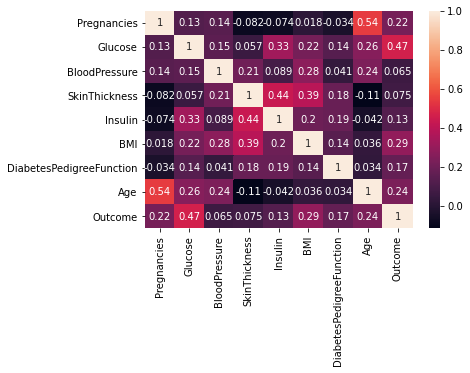

In [8]:
ax = sns.heatmap(df.corr(), annot=True)

HANDLING MISSING VALUES

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

HANDLING DUPLICATE RECORDS

In [10]:
duplicate=df.duplicated()
print(duplicate.sum())

0


HANDLING OUTLIERS

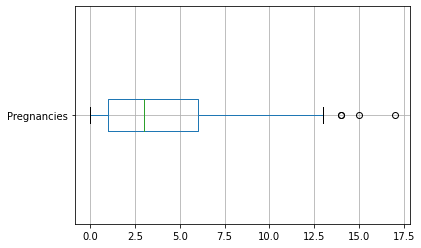

In [33]:
df.boxplot(column=["Pregnancies"],vert =False)
plt.show()

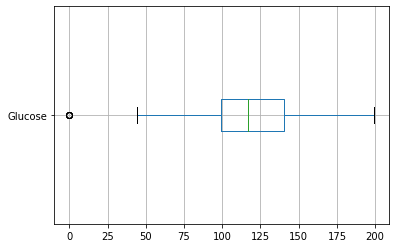

In [32]:
df.boxplot(column=["Glucose"],vert =False)
plt.show()

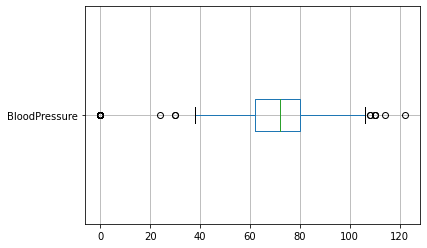

In [31]:
df.boxplot(column=["BloodPressure"],vert =False)
plt.show()

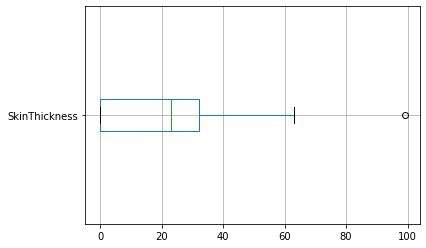

In [30]:
df.boxplot(column=["SkinThickness"],vert =False)
plt.show()

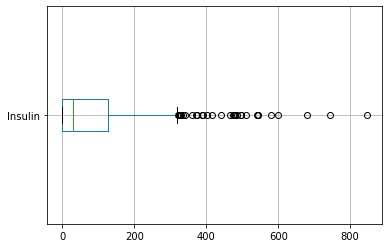

In [29]:
df.boxplot(column=["Insulin"],vert =False)
plt.show()

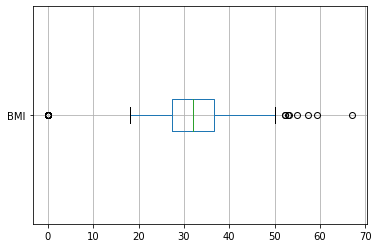

In [28]:
df.boxplot(column=["BMI"],vert =False)
plt.show()

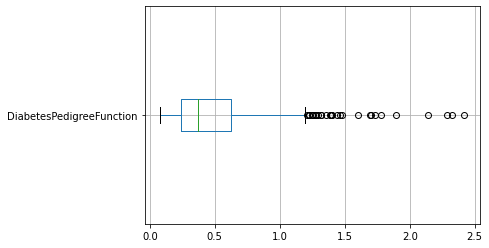

In [27]:
df.boxplot(column=["DiabetesPedigreeFunction"],vert =False)
plt.show()

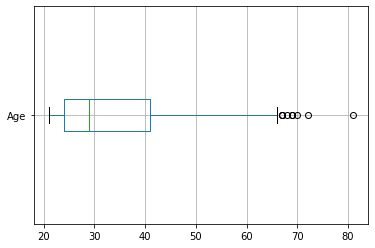

In [26]:
df.boxplot(column=["Age"],vert =False)
plt.show()

In [40]:
#removing outliers using IQR (Interquartile range)
def outlier(column):
    sorted(column)
    Q1,Q3=column.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5 * IQR)
    upper_range=Q3+(1.5 * IQR)
    return lower_range,upper_range


In [48]:
columns_name=["Pregnancies" ,"Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]

In [49]:
for x in columns_name:
    low,high= outlier(df[x])
    df[x]=np.where(df[x]>high,high,df[x])
    df[x]=np.where(df[x]<low,low,df[x])

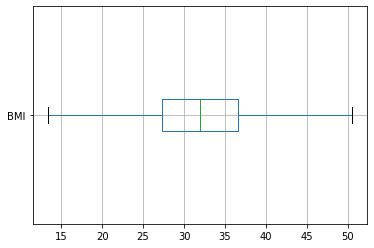

In [50]:
df.boxplot(column=["BMI"],vert =False)
plt.show()

NORMALIZING AND SCALES

In [54]:
scale=StandardScaler()
scale

StandardScaler()

In [57]:
for x in columns_name:
    df[x]=scale.fit_transform(df[[x]])

##TRAINING AND TESTING THE MODEL

In [58]:
#X_train, X_Test, Y_Train, Y_Test = train_test_split(df.iloc[:, :8], df.iloc[:, 8], test_size = 0.3, shuffle = True)
X_train,X_test, Y_train , Y_test = train_test_split(df.iloc[:, :8], df.iloc[:, 8], test_size= 0.3)

KNeighborsClassifier

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score
knn_classifier = KNeighborsClassifier(n_neighbors=49, weights="distance" ,algorithm='auto')

In [60]:
knn_classifier.fit(X_train, Y_train)
preds = knn_classifier.predict(X_test)

print(accuracy_score(preds, Y_test)*100)

74.45887445887446


In [41]:
print(knn_classifier.predict_proba(X_test))

[[0.93036104 0.06963896]
 [0.62673114 0.37326886]
 [0.77185537 0.22814463]
 [0.55954205 0.44045795]
 [0.49710317 0.50289683]
 [0.57379416 0.42620584]
 [0.48445938 0.51554062]
 [0.9559015  0.0440985 ]
 [0.35512537 0.64487463]
 [0.70460236 0.29539764]
 [0.95858108 0.04141892]
 [0.49749885 0.50250115]
 [0.59625914 0.40374086]
 [0.42762859 0.57237141]
 [0.96798194 0.03201806]
 [0.51979707 0.48020293]
 [0.72660139 0.27339861]
 [0.74548633 0.25451367]
 [0.42868311 0.57131689]
 [0.70758574 0.29241426]
 [0.49312025 0.50687975]
 [0.60739017 0.39260983]
 [0.53500797 0.46499203]
 [0.93475134 0.06524866]
 [0.87087216 0.12912784]
 [0.93486387 0.06513613]
 [0.8052039  0.1947961 ]
 [0.81933828 0.18066172]
 [0.39264571 0.60735429]
 [0.75658036 0.24341964]
 [0.37035746 0.62964254]
 [0.70914608 0.29085392]
 [0.80002071 0.19997929]
 [0.51906131 0.48093869]
 [0.54819383 0.45180617]
 [0.85771605 0.14228395]
 [0.92309139 0.07690861]
 [0.42615256 0.57384744]
 [0.90217355 0.09782645]
 [0.45652898 0.54347102]


# NAIVE BAYES

In [61]:
#nb is less used in real value features
#gaussian nb used for real value features even tho naive basyed isnt prefered
# BernoulliNB used for binary features
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
gnb_pred=gnb.predict(X_test)


In [62]:
print(accuracy_score(gnb_pred, Y_test)*100)

76.62337662337663


# LOGISTIC REGRESSION


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

In [64]:
modelLG= LogisticRegression(penalty='l2', C=1.0)
modelLG.fit(X_train, Y_train)
predsLG = modelLG.predict(X_test)

In [65]:
print(accuracy_score(predsLG, Y_test)*100)

80.08658008658008


GRID SEARCH

In [66]:
from sklearn.model_selection import GridSearchCV


In [76]:
#parameters in grid search
tuned_parameters=[{"C":[10**-4,10**-2,10**0,10**2,10**4]}]

#using grid search
GSmodel=GridSearchCV(LogisticRegression(),tuned_parameters, scoring= 'f1')
GSmodel.fit(X_train, Y_train)

#print the best model using Grind search with C(1/lambda)
print(GSmodel.best_estimator_)
print(GSmodel.score(X_test,Y_test))

LogisticRegression(C=100)
0.7012987012987013


In [77]:
predsLGGS = GSmodel.predict(X_test)
print(accuracy_score(predsLGGS, Y_test)*100)

80.08658008658008


In [43]:
#RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
logistic = LogisticRegression()
distributions = dict(C=uniform(loc=0, scale=4),penalty=['l2', 'l1']) # DOUBT
clf = RandomizedSearchCV(logistic, distributions, random_state=0)
search = clf.fit(X_test,Y_test)
search.best_params_

c:\users\feedf\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\feedf\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\feedf\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "c:\users\feedf\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
c:\users\feedf\appdata\local\prog

c:\users\feedf\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\feedf\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scik

{'C': 1.5337660753031108, 'penalty': 'l2'}

# svm

In [78]:
from sklearn import svm

In [79]:
clf = svm.SVC()
clf.fit(X_train, Y_train)

SVC()

In [80]:
AZ=clf.predict(X_test)

In [81]:
print(accuracy_score(AZ,Y_test) * 100)

78.78787878787878


# DecisionTreeClassifier

In [82]:
from sklearn.tree import DecisionTreeClassifier 

In [83]:
clf = DecisionTreeClassifier(random_state=0,max_depth=3, min_samples_split=4)
clf.fit(X_train, Y_train)
DT=clf.predict(X_test)

In [84]:
print(accuracy_score(DT,Y_test) * 100)

73.59307359307358


# RANDOM FORREST

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
clfRF = RandomForestClassifier( random_state=0)
clfRF.fit(X_train, Y_train)
RF=clfRF.predict(X_test)

In [86]:
print(accuracy_score(RF,Y_test) * 100)

76.19047619047619
